In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("C:/Users/Admin/Documents/Streamlit_Bank_Loan_Prediction/Loan_Data"))

# Any results you write to the current directory are saved as output.
from sklearn import metrics
from time import time

['credit_test.csv', 'credit_train.csv', 'test.csv', 'train.csv']


In [18]:
df = pd.read_csv("C:/Users/Admin/Documents/Streamlit_Bank_Loan_Prediction/Loan_Data/credit_train.csv")
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [19]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


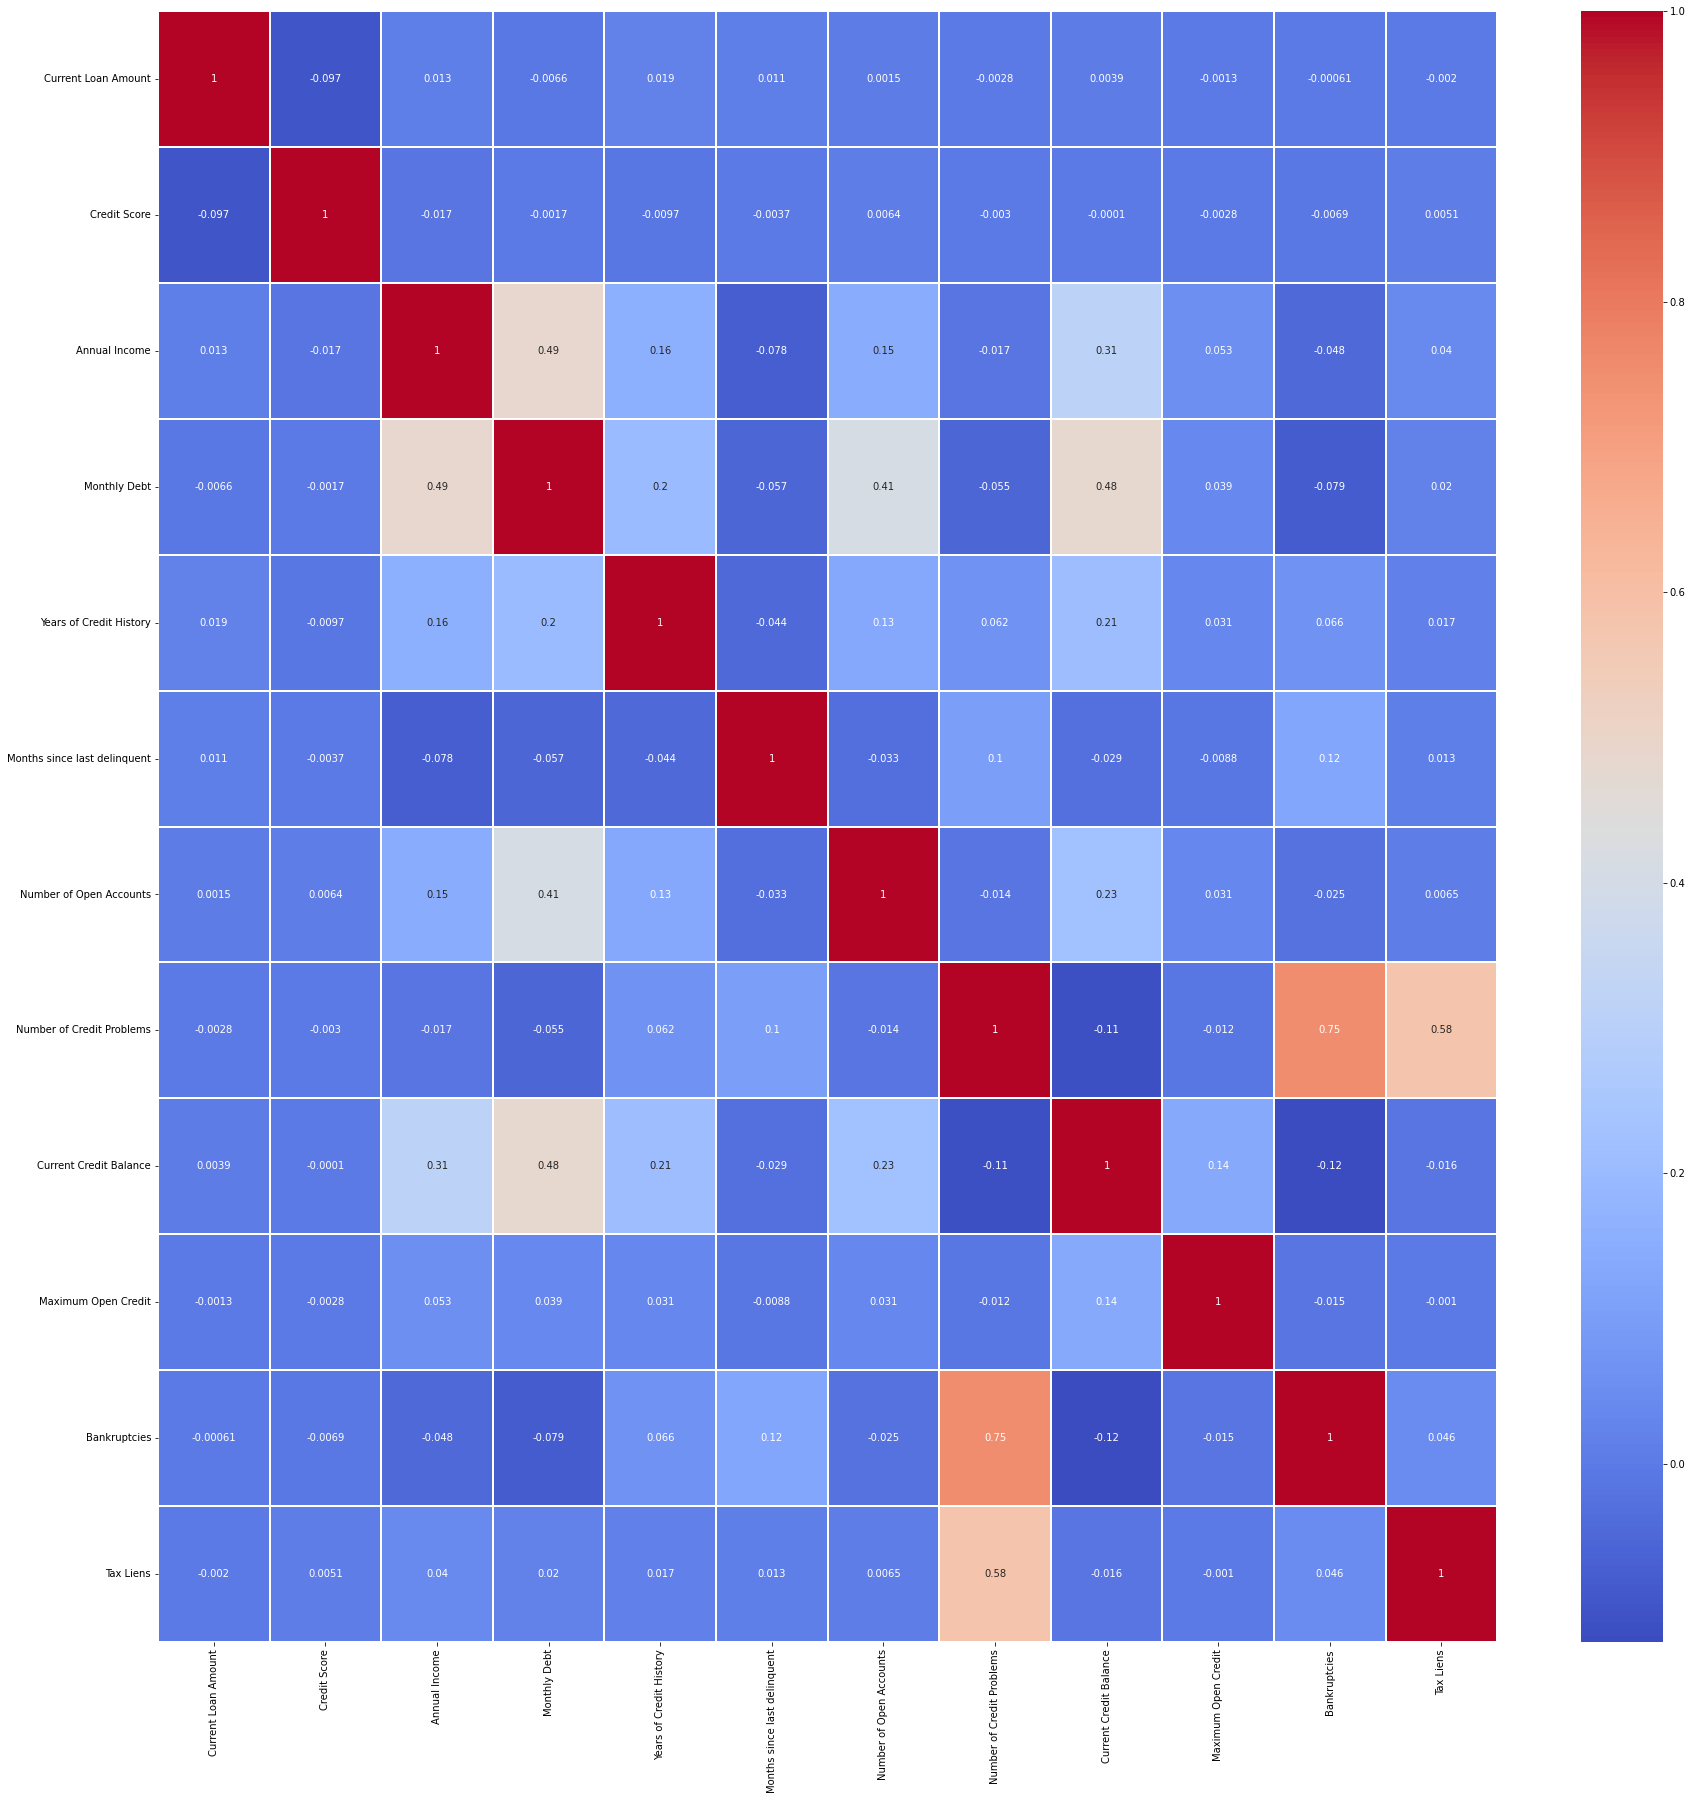

In [20]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,linewidths=0.01 ,cmap='coolwarm', cbar=True)
plt.show()

In [21]:
features =['Number of Credit Problems','Bankruptcies','Tax Liens','Loan Status']
dfRisco = df[features]
dfRisco.head()

,Number of Credit Problems,Bankruptcies,Tax Liens,Loan Status
0,1.0,1.0,0.0,Fully Paid
1,0.0,0.0,0.0,Fully Paid
2,1.0,0.0,0.0,Fully Paid
3,0.0,0.0,0.0,Fully Paid
4,0.0,0.0,0.0,Fully Paid


In [22]:
dfRisco.describe()

,Number of Credit Problems,Bankruptcies,Tax Liens
count,100000.000000,99796.000000,99990.000000
mean,0.168310,0.117740,0.029313
std,0.482705,0.351424,0.258182
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,15.000000,7.000000,15.000000


In [23]:
dfRisco.isnull()

,Number of Credit Problems,Bankruptcies,Tax Liens,Loan Status
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
100509,True,True,True,True
100510,True,True,True,True
100511,True,True,True,True
100512,True,True,True,True


In [24]:
dfRiscoLimpo = dfRisco[df['Number of Credit Problems'].notnull() & df['Bankruptcies'].notnull() & df['Tax Liens'].notnull() & df['Loan Status'].notnull()]
dfRiscoLimpo.describe()

,Number of Credit Problems,Bankruptcies,Tax Liens
count,99796.000000,99796.000000,99796.00000
mean,0.168574,0.117740,0.02937
std,0.483083,0.351424,0.25843
min,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.00000
max,15.000000,7.000000,15.00000


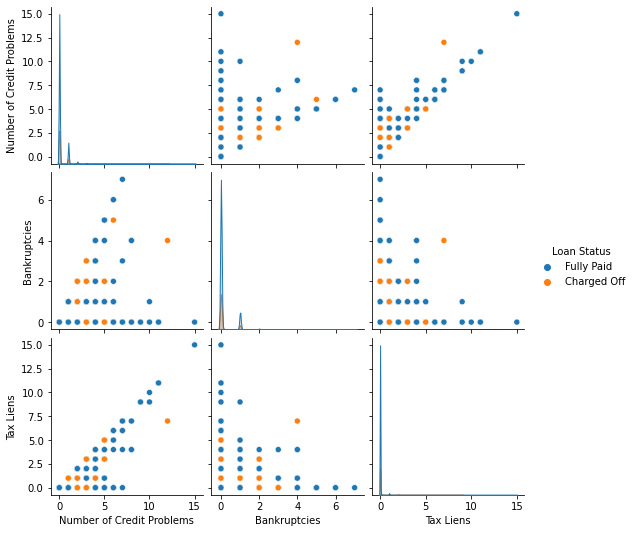

In [25]:
sns.pairplot(data=dfRiscoLimpo, hue='Loan Status')

In [26]:
X = dfRiscoLimpo[features[:3]]
y = dfRiscoLimpo[features[3:]]
X.head()

,Number of Credit Problems,Bankruptcies,Tax Liens
0,1.0,1.0,0.0
1,0.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [27]:
#Dividir dados de treinamento e teste
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20)
print(len(x_train),len(x_test))

79836 19960


In [33]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

tempoTraining = time()
nb.fit(x_train,y_train)
tempoTraining = time() - tempoTraining

tempoprediction = time()
prediction = nb.predict(x_test)
tempoprediction = time() - tempoprediction

accuracy = metrics.accuracy_score(prediction,y_test)

comparaeclassified  = pd.DataFrame([['Naive Bayes',accuracy,tempoTraining,tempoprediction]],columns=[' classified ', ' accuracy', '(t)Training','(t)prediction'])

print('The accuracy of the naive Bayes was: ',accuracy)

The accuracy of the naive Bayes was:  0.7704408817635271


C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

tempoTraining = time()
dtc.fit(x_train,y_train)
tempoTraining = time() - tempoTraining

tempoprediction = time()
prediction = dtc.predict(x_test)
tempoprediction = - time() - tempoprediction

accuracy = metrics.accuracy_score(prediction,y_test)

comparaeclassified.append(pd.DataFrame([['DecisionTreeClassifier',accuracy,tempoTraining,tempoprediction]]))

print('The accuracy of the Decisiontreeclassifier was: ',metrics.accuracy_score(prediction,y_test))

The accuracy of the Decisiontreeclassifier was:  0.7727955911823647


C:\Users\Admin\AppData\Local\Temp\ipykernel_3684\3577432311.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparaeclassified.append(pd.DataFrame([['DecisionTreeClassifier',accuracy,tempoTraining,tempoprediction]]))


In [35]:
from sklearn import svm
svc = svm.SVC()

tempoTraining = time()
svc.fit(x_train,y_train)
tempoTraining = time() - tempoTraining

tempoprediction = time()
prediction = svc.predict(x_test)
tempoprediction = tempoprediction - time()

accuracy = metrics.accuracy_score(prediction,y_test)

comparaeclassified.append([['SVC',accuracy,tempoTraining,tempoprediction]])

print('The accuracy of the SVC was: ',metrics.accuracy_score(prediction,y_test))

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of the SVC was:  0.7729458917835671


C:\Users\Admin\AppData\Local\Temp\ipykernel_3684\765356725.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparaeclassified.append([['SVC',accuracy,tempoTraining,tempoprediction]])


In [36]:
comparaeclassified

,classified,accuracy,(t)Training,(t)prediction
0,Naive Bayes,0.770441,0.113993,0.002


In [37]:
dfRiscoLimpo[:3]

,Number of Credit Problems,Bankruptcies,Tax Liens,Loan Status
0,1.0,1.0,0.0,Fully Paid
1,0.0,0.0,0.0,Fully Paid
2,1.0,0.0,0.0,Fully Paid


In [38]:
parameters = [[1.0,0.0,0.0]]
print("payment risk: " + svc.predict(parameters))


['payment risk: Fully Paid']


C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
